# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [11]:
dataset_train = pd.read_csv('MSFT_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [12]:
training_set

array([[ 30.620001],
       [ 30.85    ],
       [ 30.879999],
       ...,
       [330.089996],
       [337.23999 ],
       [335.820007]])

In [13]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.522566,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.530165,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.385763,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.142551,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.302160,51197400
...,...,...,...,...,...,...,...
3441,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
3442,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000
3443,2023-09-08,330.089996,336.160004,329.459991,334.269989,334.269989,19530100
3444,2023-09-11,337.239990,338.420013,335.429993,337.940002,337.940002,16583300


### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [15]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [18]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [23]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [25]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
106/106 [==============================] - 16s 18ms/step - loss: 0.0082
Epoch 2/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 3/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 4/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 5/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 6/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 7/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 8/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 9/100
106/106 [==============================] - 2s 18ms/step - loss: 0.0015
Epoch 10/100
106/106 [==============================] - 2s 15ms/step - loss: 0.0014
Epoch 11/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 12/100
106/106 [==============================] - 1s 13ms/step - loss: 0.0014


## Part 3 - Making the predictions and visualising the results

# Getting the predicted stock price of Aug 2023

In [26]:
dataset_test = pd.read_csv('MSFT_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-08-2023,335.190002,338.540009,333.700012,336.339996,335.629395,18311900
1,02-08-2023,333.630005,333.630005,326.359985,327.500000,326.808075,27761300
2,03-08-2023,326.000000,329.880005,325.950012,326.660004,325.969849,18253700
3,04-08-2023,331.880005,335.140015,327.239990,327.779999,327.087494,23727700
4,07-08-2023,328.369995,331.109985,327.519989,330.109985,329.412537,17741500
5,08-08-2023,326.959991,328.750000,323.000000,326.049988,325.361115,22327600
6,09-08-2023,326.470001,327.109985,321.049988,322.230011,321.549225,22373300
7,10-08-2023,326.019989,328.260010,321.179993,322.929993,322.247711,20113700
8,11-08-2023,320.260010,322.410004,319.209991,321.010010,320.331787,24342600
9,14-08-2023,321.390015,324.059998,320.079987,324.040009,323.355408,18836100


In [28]:
real_stock_price

array([[335.190002],
       [333.630005],
       [326.      ],
       [331.880005],
       [328.369995],
       [326.959991],
       [326.470001],
       [326.019989],
       [320.26001 ],
       [321.390015],
       [323.      ],
       [320.799988],
       [320.540009],
       [314.48999 ],
       [317.929993],
       [325.5     ],
       [323.820007],
       [332.850006],
       [321.470001],
       [325.660004]])

# Getting the predicted stock price of Aug 2023

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [30]:
X_test.shape

(20, 60, 1)

In [31]:
predicted_stock_price

array([[324.40237],
       [325.01392],
       [325.13766],
       [323.96393],
       [323.50027],
       [323.00443],
       [322.2566 ],
       [321.46494],
       [320.71564],
       [319.16846],
       [317.79272],
       [317.1124 ],
       [316.4459 ],
       [315.8214 ],
       [314.2847 ],
       [313.32858],
       [314.2321 ],
       [315.28598],
       [317.5917 ],
       [317.7911 ]], dtype=float32)

In [32]:
predicted_stock_price.shape

(20, 1)

In [33]:
dataset_total

0      30.620001
1      30.850000
2      30.879999
3      30.629999
4      30.280001
         ...    
15    325.500000
16    323.820007
17    332.850006
18    321.470001
19    325.660004
Name: Open, Length: 3466, dtype: float64

### Visualising the results

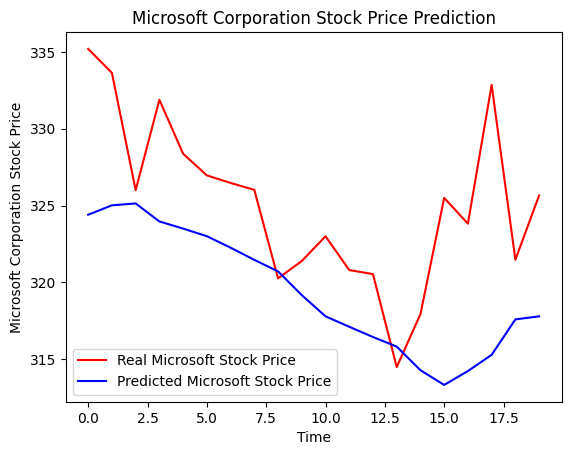

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Corporation Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Corporation Stock Price')
plt.legend()
plt.show()